In [7]:
from lambeq import BobcatParser, TreeReader, TreeReaderMode, spiders_reader, cups_reader, stairs_reader
from lambeq import TensorAnsatz, SpiderAnsatz, MPSAnsatz, IQPAnsatz, AtomicType
from discopy import Dim
from classic_pipeline import *
from quantum_pipeline import *

In [8]:
#parser declaration

bobcat_parser = BobcatParser(verbose = "progress")
spider_parser = spiders_reader
cups_parser = cups_reader
stairs_parser = stairs_reader
tree_parser = TreeReader(mode=TreeReaderMode.RULE_ONLY)

In [9]:
#ansatze declaration

tensor_ansatz = TensorAnsatz({AtomicType.NOUN: Dim(2), AtomicType.SENTENCE: Dim(2), AtomicType.CONJUNCTION: Dim(2), AtomicType.PUNCTUATION: Dim(2), AtomicType.NOUN_PHRASE: Dim(2), AtomicType.PREPOSITIONAL_PHRASE: Dim(2)})
spider_ansatz = SpiderAnsatz({AtomicType.NOUN: Dim(2), AtomicType.SENTENCE: Dim(2)})
mps_ansatz = MPSAnsatz({AtomicType.NOUN: Dim(2), AtomicType.SENTENCE: Dim(2)}, bond_dim = 3)
iqp_ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0}, n_layers = 1, n_single_qubit_params = 3)

In [10]:
#data-extracion for classic pipeline

pip = ClassicPipeline(bobcat_parser, tensor_ansatz)
pip.add_rewriter_rules(ClassicPipeline.SUPPORTED_RULES[0], ClassicPipeline.SUPPORTED_RULES[1], ClassicPipeline.SUPPORTED_RULES[4])
#train_labels, train_circuits = pip.create_circuits_and_labels("C:\\Users\\calif\\Documents\\GitHub\\Tesi-Quantum-NLP\\project\\datasets\\edited_datasets\\GPS_edited.csv", "n")
#test_labels, test_circuits = pip.create_circuits_and_labels("C:\\Users\\calif\\Documents\\GitHub\\Tesi-Quantum-NLP\\project\\datasets\\edited_datasets\\ePurse_edited.csv", "n")
train_labels, train_circuits = pip.create_circuits_and_labels("C:\\Users\\calif\\Documents\\GitHub\\Tesi-Quantum-NLP\\project\\datasets\\tutorial\\mc_train_data.txt", "n")
test_labels, test_circuits = pip.create_circuits_and_labels("C:\\Users\\calif\\Documents\\GitHub\\Tesi-Quantum-NLP\\project\\datasets\\tutorial\\mc_test_data.txt", "n")

Tagging sentences:   0%|          | 0/18 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/70 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/70 [00:00<?, ?it/s]

Tagging sentences:   0%|          | 0/8 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/30 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1:   train/loss: 0.7727   valid/loss: 0.7638   train/acc: 0.5143   valid/acc: 0.4167
Epoch 5:   train/loss: 0.7032   valid/loss: 0.7364   train/acc: 0.5500   valid/acc: 0.4333
Epoch 10:  train/loss: 0.6732   valid/loss: 0.7230   train/acc: 0.5786   valid/acc: 0.4333
Epoch 15:  train/loss: 0.6537   valid/loss: 0.7117   train/acc: 0.6429   valid/acc: 0.5000
Epoch 20:  train/loss: 0.6133   valid/loss: 0.6809   train/acc: 0.6786   valid/acc: 0.5833
Epoch 25:  train/loss: 0.5176   valid/loss: 0.5940   train/acc: 0.8286   valid/acc: 0.7500
Epoch 30:  train/loss: 0.3593   valid/loss: 0.4402   train/acc: 0.8929   valid/acc: 0.8667
Epoch 35:  train/loss: 0.2107   valid/loss: 0.2753   train/acc: 0.9286   valid/acc: 0.9000
Epoch 40:  train/loss: 0.1131   valid/loss: 0.1635   train/acc: 0.9429   valid/acc: 0.9167
Epoch 45:  train/loss: 0.0499   valid/loss: 0.1085   train/acc: 0.9929   valid/acc: 0.9500
Epoch 50:  train/loss: 0.0193   valid/loss: 0.0983   train/acc: 0.9929   valid/acc: 0.9500

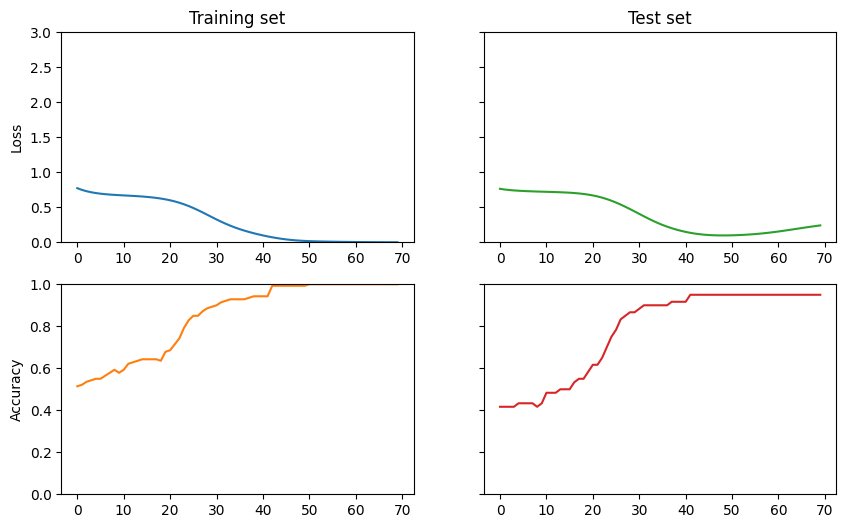

In [11]:
train_set, test_set = pip.create_dataset(train_labels, train_circuits), pip.create_dataset(test_labels, test_circuits)
pip.create_trainer(train_circuits, test_circuits)
pip.train_model(train_set, test_set)
pip.plot()

In [ ]:
#data-extracion for quantum pipeline

pip = QuantumPipeline(bobcat_parser, iqp_ansatz)
train_labels, train_circuits = pip.create_circuits_and_labels("code/pipeline/rp_train_data.txt")
test_labels, test_circuits = pip.create_circuits_and_labels("code/pipeline/rp_test_data.txt")